# 在客户离网率预测任务中使用决策树和最近邻方法

In [2]:
import pandas as pd
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')
df.head(-1)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [3]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)
df.head(-1)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,79,415,0,1,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


决策树和 k-NN。一开始，我们并不知道如何设置模型参数能使模型表现好，所以可以使用随机参数方法，假定树深（max_dept）为 5，近邻数量（n_neighbors）为10

In [4]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
x_train,x_holdout,y_train,y_holdout = train_test_split(df.values,y,test_size = 0.3,random_state = 17)
tree = DecisionTreeClassifier(max_depth=5,random_state=17)

knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(x_train,y_train)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [5]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(x_holdout)
accuracy_score(y_holdout,tree_pred)

0.94

In [6]:
knn_pred = knn.predict(x_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

从上可知，决策树的准确率约为 94%，k-NN 的准确率约为 88%，于是仅使用我们假定的随机参数（即没有调参），决策树的表现更好。

现在，使用交叉验证确定树的参数，对每次分割的 max_dept（最大深度 h）和 max_features（最大特征数）进行调优。GridSearchCV() 函数可以非常简单的实现交叉验证，下面程序对每一对 max_depth 和 max_features 的值使用 5 折验证计算模型的表现，接着选择参数的最佳组合。

**GridSearchCVAPI介绍**
`sklearn.model_selection.GridSearchCV(estimator,param_grid,cv)`
- **estimator:** 需要使用的分类器
- **param_grid:**:需要优化的参数
- **cv:**:交叉验证的次数      
- **n_jobs:** 这指定了并行运行的作业数。-1 表示使用计算机上的所有核心。   
- **verbose:** 这指定了是否打印进度消息到标准输出,在搜索过程中打印出进度条和相关信息，如前正在尝试的参数组合、每个组合的得分等   
返回值属性：
- **best_params_：**（dict）最佳参数
- **best_score_ ：**（float）最佳结果
- **best_estimator_：**（estimator）最佳分类器
- **cv_results_：**（dict）交叉验证结果
- **best_index_：**（int）最佳参数的索引
- **n_splits_：**（int）交叉验证的次数


In [10]:
from sklearn.model_selection import GridSearchCV,cross_val_score
tree_params = {'max_depth':range(5,7),'max_features':range(16,18)}
tree_grid = GridSearchCV(tree,tree_params,cv=5,n_jobs=-1,verbose = True)

tree_grid.fit(x_train,y_train)
# tree_grid

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 7),
                         'max_features': range(16, 18)},
             verbose=True)

In [11]:
tree_grid.best_params_,tree_grid.best_score_,accuracy_score(y_holdout, tree_grid.predict(x_holdout))

({'max_depth': 6, 'max_features': 17}, 0.94257014456259, 0.946)

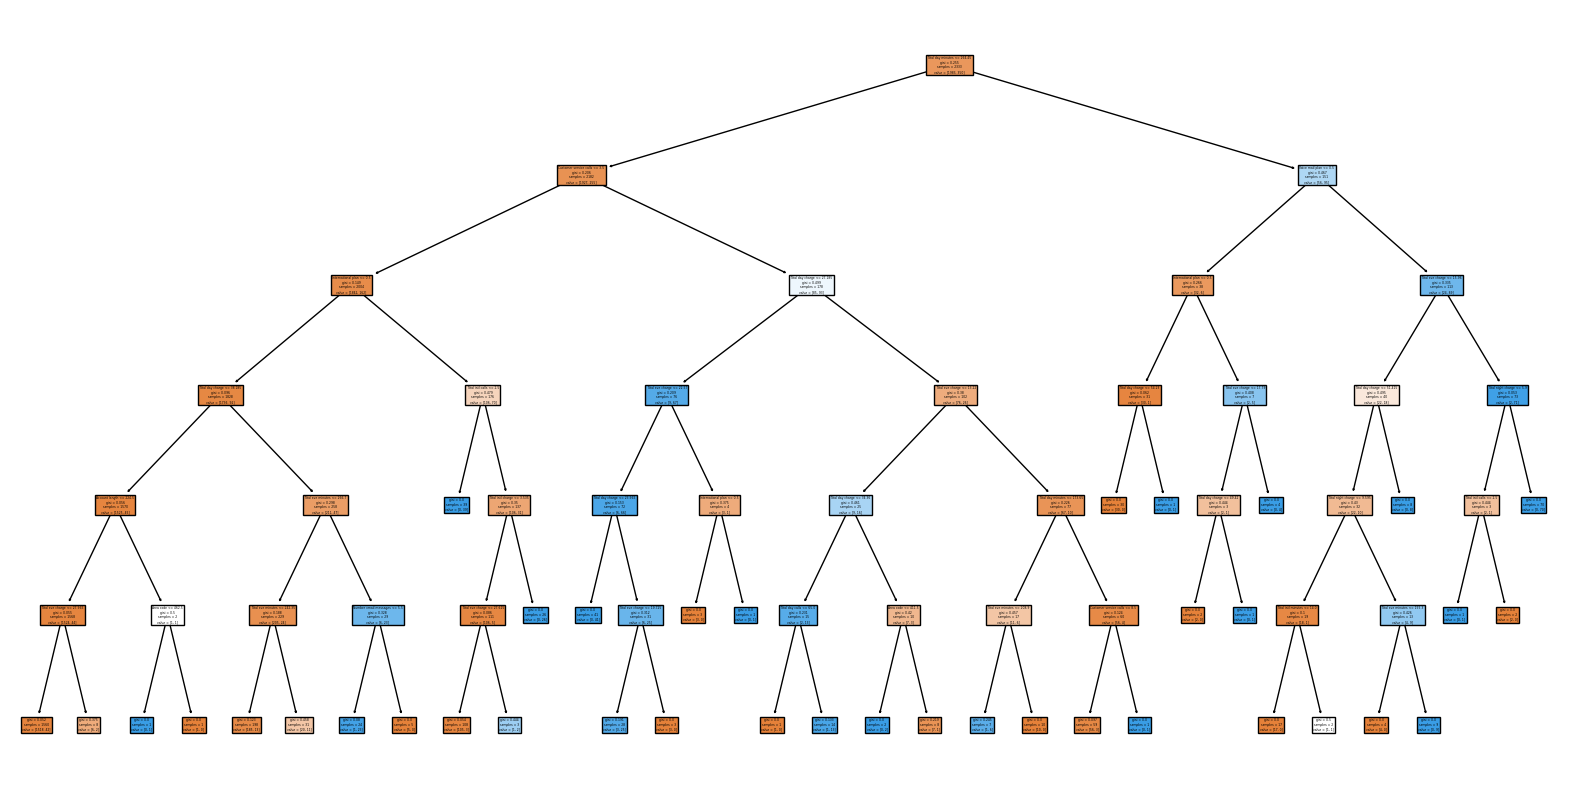

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(tree_grid.best_estimator_,feature_names=df.columns.tolist(),filled = True)
plt.show()

In [22]:
# 现在，再次使用交叉验证对 k-NN 的 k 值（即邻居数）进行调优。
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn_pipe = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_jobs = -1))])
knn_params = {'knn__n_neighbors':range(6,8)}
knn_grid = GridSearchCV(knn_pipe,knn_params,cv=5,n_jobs=-1,verbose = True)
knn_grid.fit(x_train,y_train)

knn_grid.best_params_, knn_grid.best_score_


Fitting 5 folds for each of 2 candidates, totalling 10 fits


({'knn__n_neighbors': 7}, 0.8859867109023905)

In [25]:
accuracy_score(y_holdout, knn_grid.predict(x_holdout))

0.89

使用 RandomForestClassifier() 方法再训练一个随机森林（可以把它想象成一群互相协作的决策树），看看能否在这个任务上有更好的表现。

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=17)
np.mean(cross_val_score(forest,x_train,y_train,cv = 5))


0.9494233119813256

In [30]:
forest_params = {'max_depth':range(8,10),'max_features':range(5,7)}

forest_grid = GridSearchCV(forest,forest_params,cv = 5,n_jobs=-1,verbose = True)
forest_grid.fit(x_train,y_train)
forest_grid.best_params_,forest_grid.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [31]:
accuracy_score(y_holdout, forest_grid.predict(x_holdout))

0.953

为了继续讨论决策树和 k-NN 的优劣，让我们考虑另外一个简单的分类任务，在这个任务中决策树的表现不错但得到的分类边界过于复杂。

首先，在一个平面上创建一组具有 2 个分类的数据点，每个数据点是两个分类中的一个（红色表示$x_1>x_2$,黄色表示$x_1<x_2$).其实用一条直线$x_1=x_2$就可以完成它们的分类，那么决策树会这么做吗？

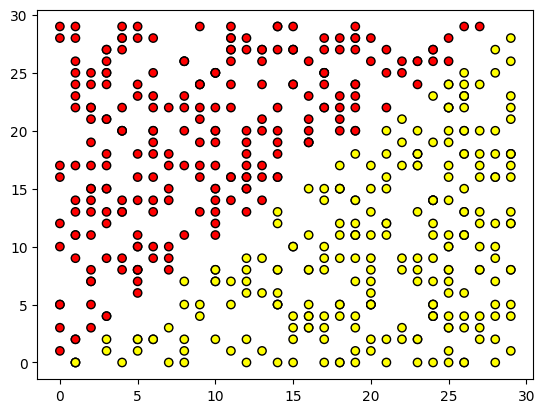

In [42]:
def form_linearly_separable_data(n=500,x1_min=0,x1_max=30,x2_min=0,x2_max=30):
    data ,target= [],[]
    for i in range(n):
        x1 = np.random.randint(x1_min,x1_max)
        x2 = np.random.randint(x2_min,x2_max)
        if np.abs(x1-x2)>0.5:
            # 由于都是整数，所以相差0.5就是相差1，去掉了x1等于x2的点
            data.append([x1,x2])
            target.append(np.sign(x1-x2))
    return np.array(data),np.array(target)
x,y = form_linearly_separable_data()
# x.shape,y.shape
plt.scatter(x[:,0],x[:,1],c = y,cmap='autumn',edgecolors='black')
# 注意 C 不应是一个单一的 RGB 数字或RGBA 序列，
# 因为不便区分。C 可以是一个 RGB 或 RGBA 二维行数组

In [44]:
tree = DecisionTreeClassifier(random_state = 17).fit(x,y)

In [45]:
# 这里我们定义一个 get_grid 方法，用于生成用于绘制决策边界坐标的网格。

def get_grid(data,step = 0.02):
    x_min, x_max = data[:, 0].min() - 1, data[:, 1].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min, y_max, step))
    return xx,yy



C:\Users\change longer\AppData\Local\Temp\ipykernel_3828\3406221842.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


Text(0.5, 1.0, 'Easy task. Decision tree compexifies everything')

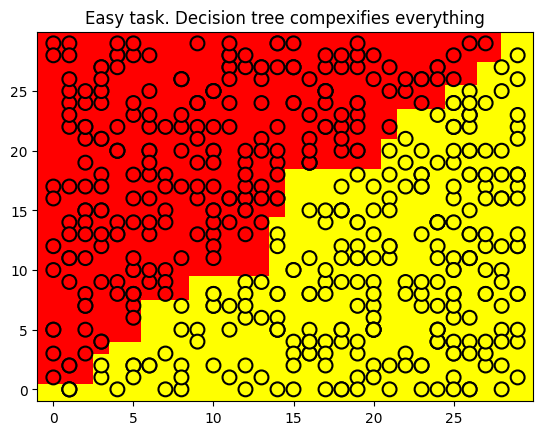

In [51]:
# 然后，并绘制分类边界。
xx,yy = get_grid(x)
predicted = tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn') 
# 绘制一个四边形网格，创建一个二维阵列的伪彩色图。
plt.scatter(x[:, 0], x[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything')

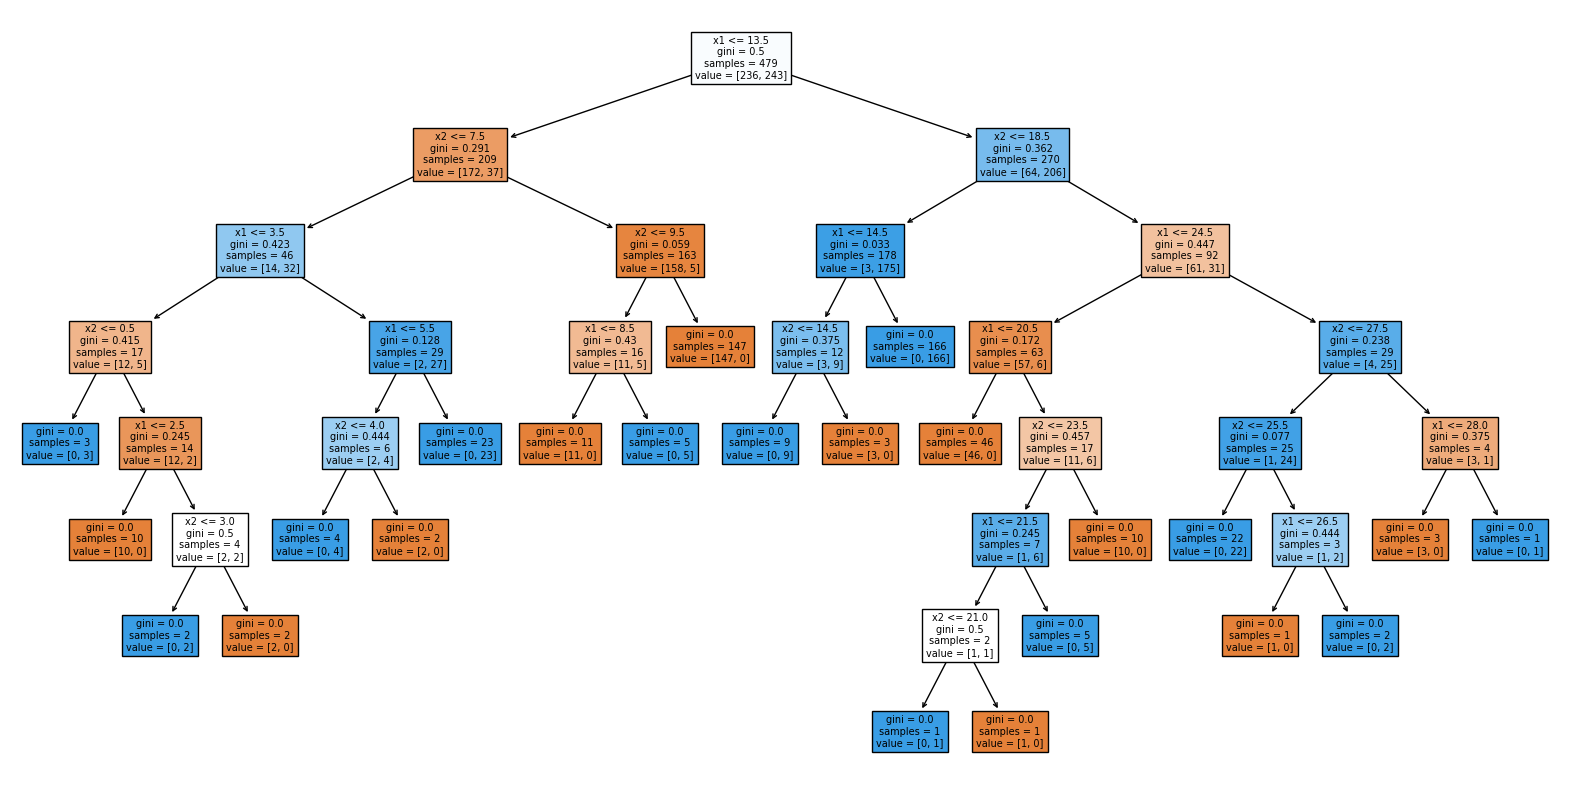

In [52]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=['x1', 'x2'], filled=True)

plt.show()

从上可知，决策树构建的边界过于复杂，而且树的深度过深，产生了过拟合现象。

再训练一个 k-NN 模型，看看它在这个任务上的表现情况。

C:\Users\change longer\AppData\Local\Temp\ipykernel_3828\2321160007.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


Text(0.5, 1.0, 'Easy task, kNN. Not bad')

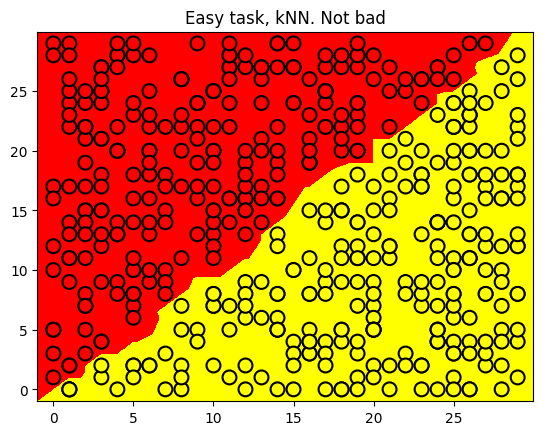

In [54]:
knn = KNeighborsClassifier(n_neighbors=1).fit(x, y)

xx, yy = get_grid(x)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(x[:, 0], x[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task, kNN. Not bad')

# 在 MNIST 手写数字识别任务中应用决策树和 k-NN


In [ ]:
from sklearn.datasets import load_digits
# 该数据库中手写数字的图片为 8x8 的矩阵，矩阵中的值表示每个像素的白色亮度。
data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])
x.shape

(1797, 64)

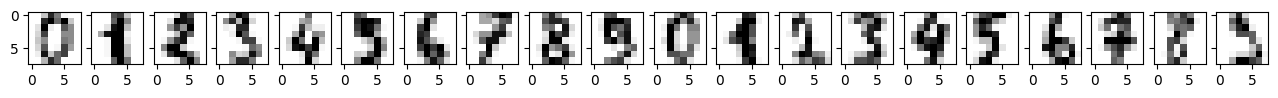

In [70]:
f,axes = plt.subplots(1,20,sharey = True,figsize = (16,6))
for i in range(20):
    axes[i].imshow(x[i,:].reshape([8,8]),cmap='Greys')

In [71]:
x_train,x_holdout,y_train,y_holdout = train_test_split(x,y,test_size = 0.3,random_state = 17)

In [72]:
tree = DecisionTreeClassifier(max_depth=5,random_state=17)
knn_pipe = Pipeline([('scaler',StandardScaler()),
                      ('knn',KNeighborsClassifier(n_neighbors= 10))])
tree.fit(x_train,y_train)
knn_pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [73]:
# 训练好之后，分别在留置集上做出预测。

tree_pred = tree.predict(x_holdout)
knn_pred = knn_pipe.predict(x_holdout)
accuracy_score(y_holdout,knn_pred),accuracy_score(y_holdout,tree_pred)

(0.975925925925926, 0.6666666666666666)

从上可知，k-NN 做得更好，不过别忘了我们用的是随机参数。现在，使用交叉验证调优决策树模型，因为这次任务所需考虑的特征比之前任务中的更多，所以可以增加参数的大小。

In [ ]:
# 交叉验证优化决策树
tree_params = {
    'max_depth':[10,20,30],
    'max_features':[30,50,64]
}
tree_grid = GridSearchCV(tree,tree_params,cv = 5,n_jobs = -1,verbose = True)
tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [30, 50, 64]},
             verbose=True)

In [77]:
tree_grid.best_params_,tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [78]:
# # 交叉验证优化k邻近
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1),x_train,y_train,cv=5))

0.9864858028204642

In [79]:
np.mean(cross_val_score(RandomForestClassifier(
    random_state=17), x_train, y_train, cv=5))

0.9753462341111744

# 最近邻方法的复杂情形
下面考虑另一种情况，即在一个分类问题中，某个特征直接和目标变量成比例的情况。



In [96]:
def form_noisy_data(n_obj=1000,n_feat = 100,random_seed = 17):
    np.seed = random_seed
    y = np.random.choice([-1,1],size=n_obj)
    # 第一个特征与目标成比例
    x1 = 0.3*y
    x_other = np.random.random(size=[n_obj,n_feat-1])
    return np.hstack([x1.reshape([n_obj,1]),x_other]),y

In [98]:
x, y = form_noisy_data()
x.shape,y.shape

((1000, 100), (1000,))

使用最近邻方法训练模型后，查看交叉验证和留置集的准确率，并绘制这两个准确率随 n_neighbors 最近邻数目 参数变化的曲线，这样的曲线被称为验证曲线。



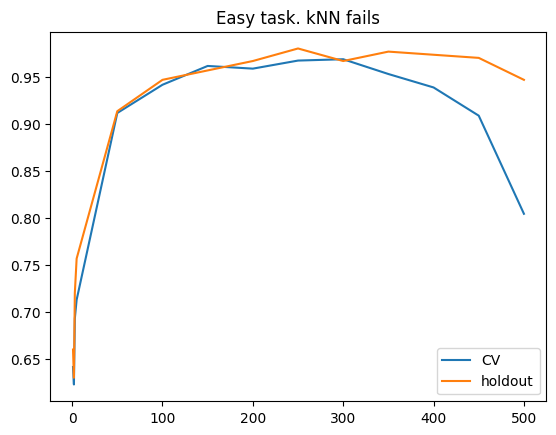

In [100]:
from sklearn.model_selection import cross_val_score
# 划分数据集
x_train,x_holdout,y_train,y_holdout = train_test_split(x,y,test_size=0.3,random_state = 17)

cv_scores,holdout_socre = [],[]
n_neighb = [1,2,3,5]+list(range(50,550,50))
n_neighb
for k in n_neighb:
    knn_pipe = Pipeline([('scaler',StandardScaler()),
                         ('knn',KNeighborsClassifier(n_neighbors=k))])
    cv_scores.append(np.mean(cross_val_score(knn_pipe,x_train,y_train,cv=5)))
    knn_pipe.fit(x_train,y_train)
    holdout_socre.append(accuracy_score(y_holdout,knn_pipe.predict(x_holdout)))
plt.plot(n_neighb,cv_scores,label = 'CV')
plt.plot(n_neighb,holdout_socre,label = 'holdout')
plt.title('Easy task. kNN fails')
plt.legend()

上图表明，即使我们尝试在较广范围内改变 n_neighbors 参数，基于欧几里得距离的 k-NN 在这个问题上依旧表现不佳。

下面用决策树训练一个模型，看看它在这个任务上的表现如何。

In [102]:
tree = DecisionTreeClassifier(random_state = 17,max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree,x_train,y_train,cv = 5))
tree.fit(x_train,y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(x_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(
    tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


在这一任务中，决策树完美地解决了问题，在交叉验证和留置集上都得到了 100% 的准确率。其实，k-NN 之所以在这个任务上表现不佳并非该方法本身的问题，而是因为使用了欧几里得距离，因为欧几里得距离没能察觉出有一个特征（成比例）比其他所有特征（噪声）更重要。


# 决策树和最近邻方法的优势和劣势


**决策树**   
**优势：**   
- 生成容易理解的分类规则，这一属性称为模型的可解释性。例如它生成的规则可能是「如果年龄不满 25 岁，并对摩托车感兴趣，那么就拒绝发放贷款」。
- 很容易可视化，即模型本身（树）和特定测试对象的预测（穿过树的路径）可以「被解释」。
- 训练和预测的速度快。
- 较少的参数数目。
- 支持数值和类别特征   


**劣势：**   
- 决策树对输入数据中的噪声非常敏感，这削弱了模型的可解释性。
- 决策树构建的边界有其局限性：它由垂直于其中一个坐标轴的超平面组成，在实践中比其他方法的效果要差。
- 我们需要通过剪枝、设定叶节点的最小样本数、设定树的最大深度等方法避免过拟合。
不稳定性，数据的细微变动都会显著改变决策树。这一问题可通过决策树集成方法来处理（以后的实验会介绍）。
- 搜索最佳决策树是一个「NP 完全」（NP-Complete）问题。了解什么是 NP-Complete 请点击  这里。实践中使用的一些推断方法，比如基于最大信息增益进行贪婪搜索，并不能保证找到全局最优决策树。
- 倘若数据中出现缺失值，将难以创建决策树模型。Friedman 的 CART 算法中大约 50% 的代码是为了处理数据中的缺失值（现在 sklearn 实现了这一算法的改进版本）。
- 这一模型只能内插，不能外推（随机森林和树提升方法也是如此）。也就是说，倘若你预测的对象在训练集所设置的特征空间之外，那么决策树就只能做出常数预测。比如，在我们的黄球和蓝球的例子中，这意味着模型将对所有位于 >19 或 <0 的球做出同样的预测。

**最邻近方法**   
**优势**   
- 实现简单。
- 研究很充分。
- 通常而言，在分类、回归、推荐问题中第一个值得尝试的方法就是最近邻方法。
- 通过选择恰当的衡量标准或核，它可以适应某一特定问题。   
**劣势**   
- 和其他复合算法相比，这一方法速度较快。但是，现实生活中，用于分类的邻居数目通常较大（100-150），在这一情形下，k-NN 不如决策树快。
- 如果数据集有很多变量，很难找到合适的权重，也很难判定哪些特征对分类/回归不重要。
依赖于对象之间的距离度量，默认选项欧几里得距离常常是不合理的。你可以通过网格搜索参数得到良好的解，但在大型数据集上的耗时很长。
- 没有理论来指导我们如何选择邻居数，故而只能进行网格搜索（尽管基本上所有的模型，在对其超参数进行调整时都使用网格搜索的方法）。在邻居数较小的情形下，该方法对离散值很敏感，也就是说，有过拟合的倾向。
- 由于「维度的诅咒」，当数据集存在很多特征时它的表现不佳。